### Задача 3. Классификация рака молочной железы
Набор данных: [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

Logistic Regression - Accuracy: 0.9737
Logistic Regression - Confusion Matrix:
[[41  2]
 [ 1 70]]

SVM - Accuracy: 0.9737
SVM - Confusion Matrix:
[[41  2]
 [ 1 70]]

Decision Tree - Accuracy: 0.9386
Decision Tree - Confusion Matrix:
[[39  4]
 [ 3 68]]

Random Forest - Accuracy: 0.9649
Random Forest - Confusion Matrix:
[[40  3]
 [ 1 70]]

Gradient Boosting - Accuracy: 0.9561
Gradient Boosting - Confusion Matrix:
[[40  3]
 [ 2 69]]



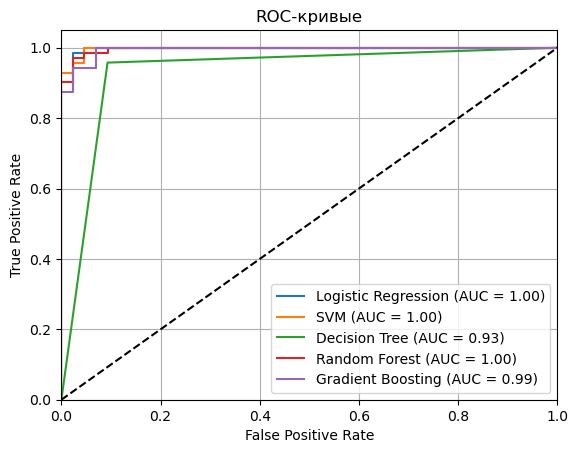

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

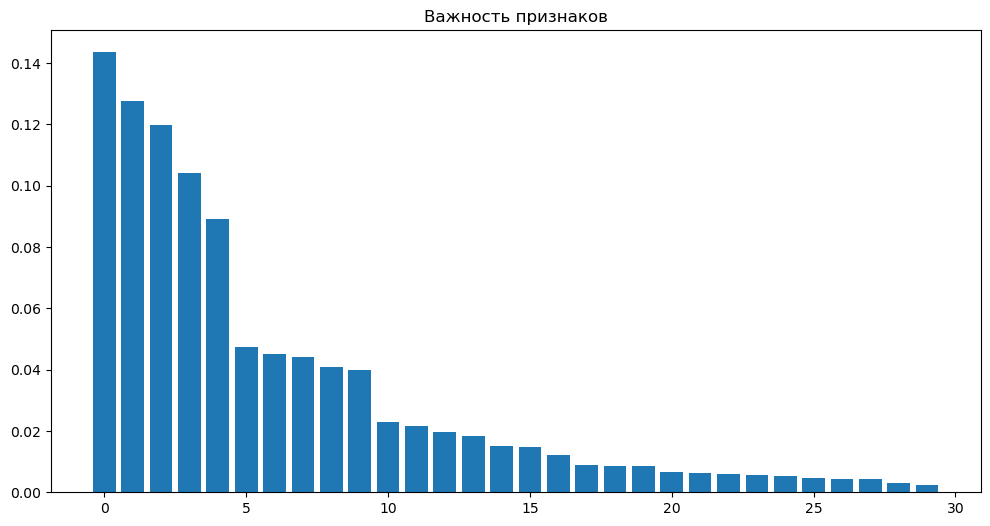

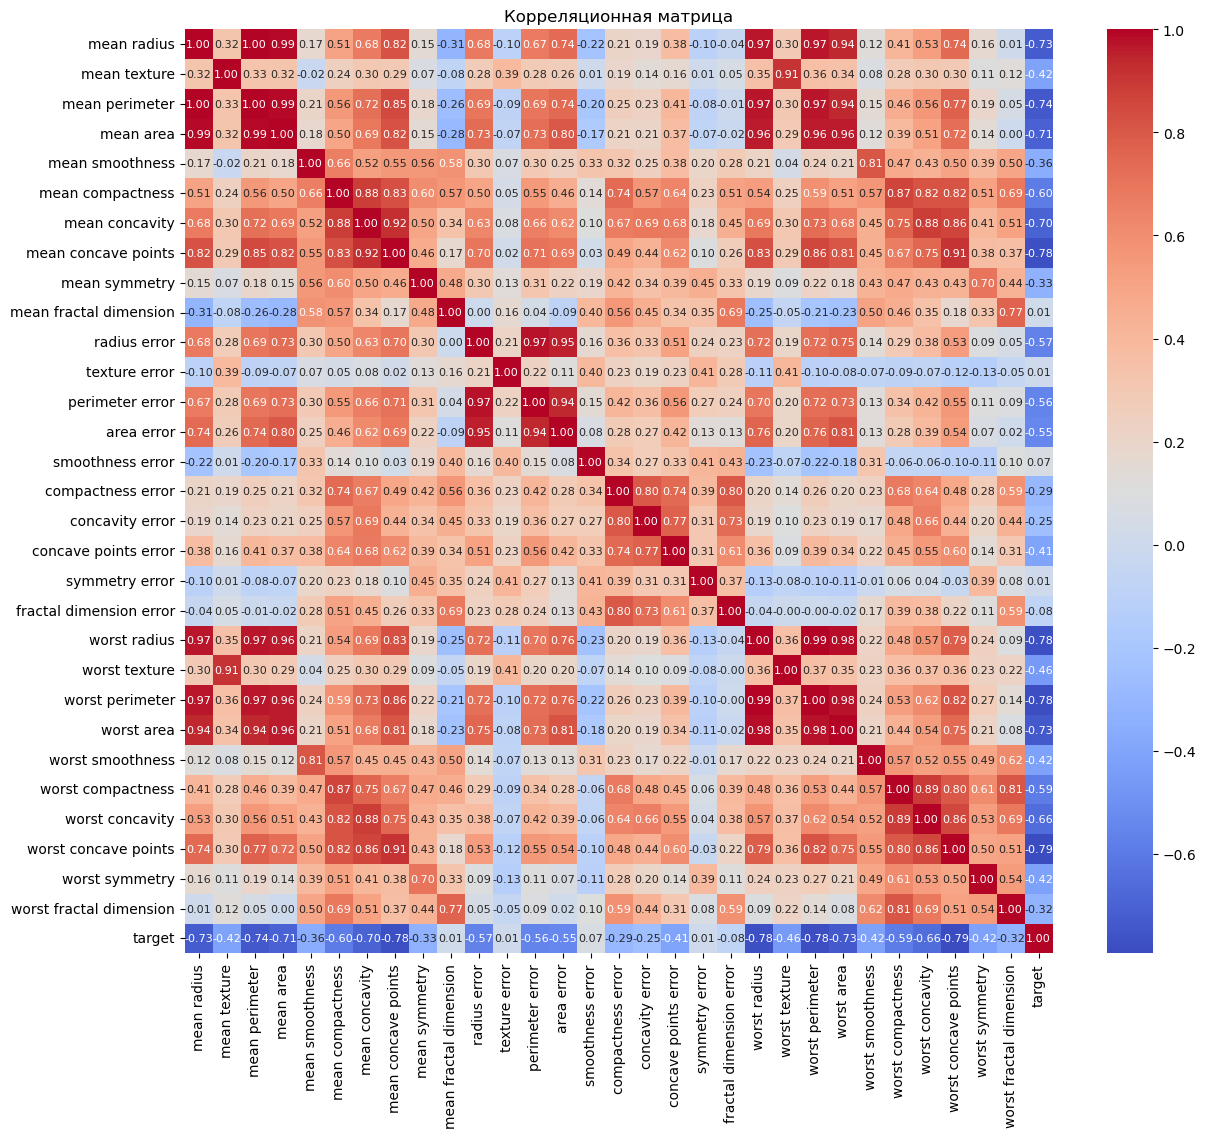

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Загрузка данных
data = load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Разделение на признаки и целевую переменную
X = df.drop('target', axis=1)
y = df['target']

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

# Обучение модели логистической регрессии
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

from sklearn.svm import SVC

# Обучение модели SVM
svm_clf = SVC(probability=True)
svm_clf.fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier

# Обучение модели дерева решений
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier

# Обучение модели случайного леса
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

from sklearn.ensemble import GradientBoostingClassifier

# Обучение модели градиентного бустинга
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix

# Оценка моделей
models = {
    "Logistic Regression": log_reg,
    "SVM": svm_clf,
    "Decision Tree": tree_clf,
    "Random Forest": rf_clf,
    "Gradient Boosting": gb_clf
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy:.4f}")
    print(f"{name} - Confusion Matrix:\n{cm}\n")

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Построение ROC-кривых
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

from sklearn.model_selection import GridSearchCV

# Поиск по сетке для SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)
print(f"Лучшие параметры для SVM: {grid.best_params_}")
print(f"Лучший результат для SVM: {grid.best_score_}")

from sklearn.model_selection import RandomizedSearchCV

# Случайный поиск для SVM
param_dist = {
    'C': np.logspace(-3, 2, 6),
    'gamma': np.logspace(-3, 2, 6),
    'kernel': ['rbf', 'poly', 'sigmoid']
}

random_search = RandomizedSearchCV(SVC(), param_dist, n_iter=50, refit=True, verbose=2, random_state=42)
random_search.fit(X_train, y_train)
print(f"Лучшие параметры для случайного поиска SVM: {random_search.best_params_}")
print(f"Лучший результат для случайного поиска SVM: {random_search.best_score_}")

# Важность признаков для модели Random Forest
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Важность признаков")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.show()

import seaborn as sns

# Построение корреляционной матрицы
corr_matrix = df.corr()

plt.figure(figsize=(14, 12))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 8})

plt.title("Корреляционная матрица")
plt.show()
